In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sa


In [2]:
data = pd.read_csv('datasets/fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.shape

(159, 7)

#### A simple linear regression model

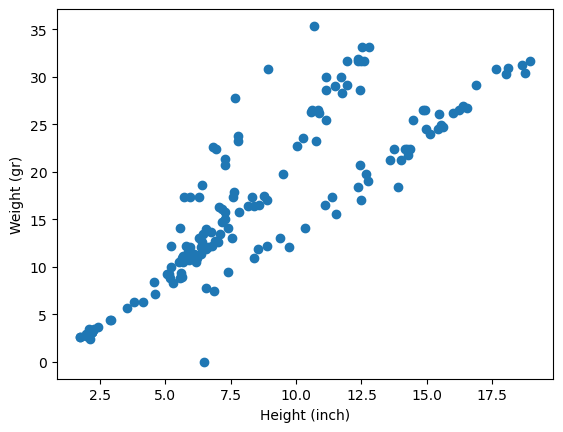

In [53]:
plt.scatter(data.Height, data.Weight)
plt.xlabel('Height (inch)')
plt.ylabel('Weight (gr)')
plt.show()

In [6]:
x = data.Height
y = data.Weight

In [7]:
x1 = sa.add_constant(x)

In [8]:
model = sa.OLS(y, x1)
result = model.fit()

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.84e-27
Time:                        07:29:54   Log-Likelihood:                -1101.0
No. Observations:                 159   AIC:                             2206.
Df Residuals:                     157   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -144.3860     45.663     -3.162      0.002    -234.579     -54.193
Height        60.4964      4.595     13.164      0.000      51.419      69.573
==============================================================================
Omnibus:                       95.711   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.586
Skew:                           2.288   Prob(JB):                    1.61e-105
Kurtosis:                      10.204   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
-144+11.52*60

547.1999999999999

In [11]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [12]:
y_hat = -144 + x*69 #y predict

#### Multivariate models

In [44]:
x = pd.DataFrame()

In [45]:
x = data.Height

In [46]:
x = pd.concat([x, pd.get_dummies(data.Species, drop_first=True)], axis=1)

In [47]:
x

,Height,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,11.5200,0,0,0,0,0,0
1,12.4800,0,0,0,0,0,0
2,12.3778,0,0,0,0,0,0
3,12.7300,0,0,0,0,0,0
4,12.4440,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,2.0904,0,0,0,0,1,0
155,2.4300,0,0,0,0,1,0
156,2.2770,0,0,0,0,1,0
157,2.8728,0,0,0,0,1,0


In [54]:
y = data.Weight

In [55]:
model = sa.OLS(y, sa.add_constant(x))

In [56]:
result = model.fit()

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     518.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          1.09e-100
Time:                        08:05:26   Log-Likelihood:                -306.84
No. Observations:                 156   AIC:                             629.7
Df Residuals:                     148   BIC:                             654.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2750      1.073    -17.039      0.000     -20.395     -16.156
Height         2.8169      0.068     41.537      0.000       2.683       2.951
Parkki         5.0970      0.745      6.843      0.000       3.625       6.569
Perch         13.6550      0.627     21.783      0.000      12.416      14.894
Pike          20.2635      0.779     26.013      0.000      18.724      21.803
Roach         11.0728      0.761     14.549      0.000       9.569      12.577
Smelt         15.3481      1.044     14.704      0.000      13.285      17.411
Whitefish     12.2799      0.859     14.294      0.000      10.582      13.978
==============================================================================
Omnibus:                       73.768   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.868
Skew:                          -1.444   Prob(JB):                    3.08e-139
Kurtosis:                      12.476   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Outliers and influential points
https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/influential-points-regression

In [34]:
cook_distances = result.get_influence().summary_frame()['cooks_d']

In [35]:
cook_thre = 4/len(data)

In [36]:
data[cook_distances>cook_thre]

,Species,Weight,Length1,Length2,Length3,Height,Width
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [40]:
from scipy import stats
std_resids = np.abs(stats.zscore(result.resid_pearson))


In [41]:
data[(cook_distances>cook_thre) & (std_resids>3)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [42]:
data = data[~((cook_distances>cook_thre) & (std_resids>3))]
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
